In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
df= pd.read_csv("CC GENERAL.csv", delimiter= ",")
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [12]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 

In [13]:
df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df=df.drop("CUST_ID", axis=1)


In [22]:
# 2.Clustering Methods : 
scaler = StandardScaler()
df_std = scaler.fit_transform(df)


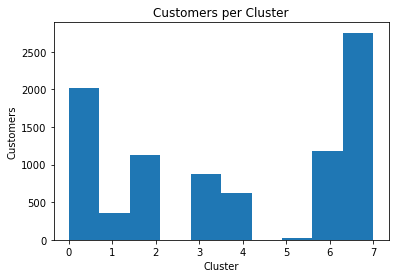

In [26]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
normalized_data = normalize(df_std) 
normalized_data = pd.DataFrame(normalized_data) 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [27]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,1
2,2
3,0
4,0
...,...
8944,2
8945,2
8946,2
8947,0


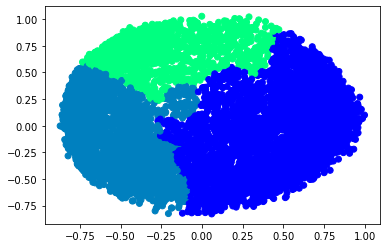

In [28]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

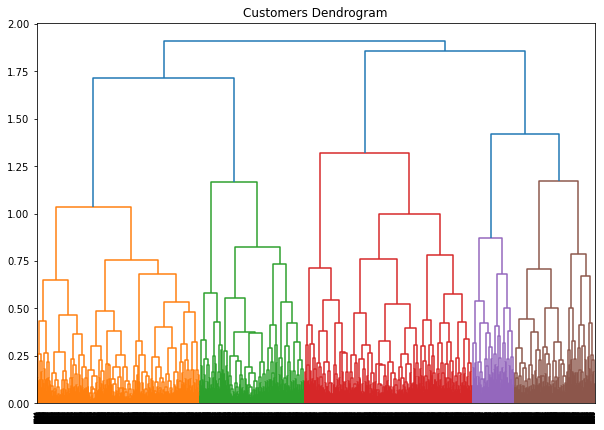

In [29]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customers Dendrogram")
dend=shc.dendrogram(shc.linkage(X_principal, method="complete"))


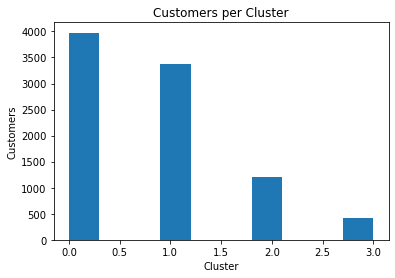

In [30]:
from sklearn import cluster 
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=4,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(df_std)
import matplotlib.pyplot as plt 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.hist(cluster_labels)
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

In [33]:
clusters = pd.concat([df, pd.DataFrame({"cluster":clustering.labels_})], axis=1)

In [34]:
pca = PCA(2)
principalComponents = pca.fit_transform(normalized_data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)
colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

(8949, 2)


In [35]:

final_data = pd.DataFrame({"x": x, "y":y, "label":clustering.labels_})
groups = final_data.groupby(clustering.labels_)

In [37]:
clustering.predict(df_std)
print(clustering.cluster_centers_)

[[-2.65507921e-01 -3.68782528e-01 -3.43196035e-01 -2.30497274e-01
  -3.87814918e-01 -1.82675500e-01 -7.97874451e-01 -3.89428281e-01
  -7.14290877e-01 -1.01542431e-01 -1.64594418e-01 -4.75006956e-01
  -3.34482558e-01 -2.62033459e-01 -1.19221470e-01 -2.58846871e-01
  -5.24555855e-02]
 [-3.21763403e-01  2.42347136e-01  1.08986743e-01  8.86392248e-04
   2.55841662e-01 -3.66397268e-01  9.83611377e-01  3.17067280e-01
   8.74027532e-01 -4.62555955e-01 -3.60322275e-01  2.96908261e-01
  -7.72936879e-02 -1.38563531e-01 -9.18813574e-02  3.94966755e-01
   5.73345072e-02]
 [ 1.45945820e+00  3.84589790e-01 -2.34680676e-01 -1.63945906e-01
  -2.53786522e-01  1.68884891e+00 -5.04997999e-01 -2.13008519e-01
  -4.50299712e-01  1.74587053e+00  1.61702581e+00 -2.83635522e-01
   8.38920790e-01  6.03732513e-01  4.90844272e-01 -4.06409573e-01
  -9.76940876e-02]
 [ 9.54377605e-01  4.62565212e-01  3.12565605e+00  2.71307916e+00
   2.40631217e+00 -1.55125368e-01  1.13623236e+00  1.79852345e+00
   1.06580585e+00 -